# This is a demonstration of our model pipeline so far - Week 21

## Here we extract the CDR3 alpha, beta and combined alpha-beta chains from our dataset

In [1]:
import pandas as pd

df = pd.read_csv('vdjdb.txt', sep="	")

df_alpha = df[df['gene'] == 'TRA']
df_beta = df[df['gene'] == 'TRB']

cdr_alpha = df_alpha['cdr3'].tolist()
cdr_beta = df_beta['cdr3'].tolist()

id = df['complex.id']
cdr_combined = []
for i in id.unique().tolist():
    if i != 0:
        index = df[df['complex.id'] == i].index.tolist()
        cdr_combined.append(df.at[index[0], 'cdr3'] + df.at[index[1], 'cdr3'])

cdr_list = [cdr_alpha, cdr_beta, cdr_combined]


## Here we use different techniques to embed our data. This is a necessary step that must be more robust than one-hot encoding

### Isometric embedding into 96 dimesnional vectors with the use of a BLOSUM62 matrix - developed by GIANA
https://github.com/s175573/GIANA/blob/master/example_of_CDR3_encoding.ipynb

Isometric embedding is a technique used to embed high-dimensional data into a low-dimensional space while preserving the pairwise distances (or similarities) between data points as much as possible. Unlike traditional dimensionality reduction methods like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE), which focus on preserving local or global structures, isometric embedding aims to maintain the intrinsic geometry of the data.

In [2]:
import numpy as np

def Encoding96(seq):
    Ndim=16 #the optimal dimension for isometric representation is 16 
    n0=Ndim*6
    ZERO=np.zeros((Ndim,Ndim))
    II=np.eye(Ndim)
    M0=np.concatenate((np.concatenate((ZERO,ZERO, II),axis=1),np.concatenate((II, ZERO, ZERO),axis=1),np.concatenate((ZERO,II, ZERO),axis=1)))
    ## Construct 6-th order cyclic group
    ZERO45=np.zeros((Ndim*3,Ndim*3))
    M6=np.concatenate((np.concatenate((ZERO45,M0),axis=1),np.concatenate((M0, ZERO45),axis=1)))

    #blosum62 Matrix
    bl62={'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0],
        'R':[-1,4,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
        'N':[-2,0,4,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
        'D':[-2,-2,1,4,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
        'C':[0,-3,-3,-3,4,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1],
        'Q':[-1,1,0,0,-3,4,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
        'E':[-1,0,0,2,-4,2,4,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2],
        'G':[0,-2,0,-1,-3,-2,-2,4,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
        'H':[-2,0,1,-1,-3,0,0,-2,4,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3],
        'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3],
        'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
        'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,4,-1,-3,-1,0,-1,-3,-2,-2],
        'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,4,0,-2,-1,-1,-1,-1,1],
        'F':[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,4,-4,-2,-2,1,3,-1],
        'P':[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,4,-1,-1,-4,-3,-2],
        'S':[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2],
        'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,4,-2,-2,0],
        'W':[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,4,2,-3],
        'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,4,-1],
        'V':[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4]}

    #let X to be the collection of MDS encoded embedding vectors for each of amino acid, which has a dimensionality of 16
    X=np.array([[-0.31230882, -0.53572156, -0.01949946, -0.12211268, -0.70947917,
        -0.42211092,  0.02783931,  0.02637933, -0.41760305,  0.21809875,
         0.53532768,  0.04833016,  0.07877711,  0.50464914, -0.26972087,
        -0.52416842],
       [ 0.29672002,  0.29005364,  0.18176298, -0.05103382, -0.34686519,
         0.58024228, -0.49282931,  0.62304281, -0.09575202,  0.30115555,
         0.09913529,  0.1577466 , -0.94391939, -0.10505925,  0.05482389,
         0.38409897],
       [-0.42212537,  0.12225749,  0.16279646,  0.60099009,  0.19734216,
         0.42819919, -0.33562418,  0.17036334,  0.4234109 ,  0.46681561,
        -0.50347222, -0.37936876,  0.1494825 ,  0.32176759,  0.28584684,
         0.68469861],
       [ 0.18599294, -0.44017825, -0.4476952 ,  0.34340976,  0.44603553,
         0.40974629, -0.60045935, -0.09056728,  0.22147919, -0.33029418,
         0.55635594, -0.54149972,  0.05459062,  0.57334159, -0.06227118,
         0.65299872],
       [-0.19010428,  0.64418792, -0.85286762,  0.21380295,  0.37639516,
        -0.67753593,  0.38751609,  0.55746524,  0.01443766,  0.1776535 ,
         0.62853954, -0.15048523,  0.55100206, -0.21426656,  0.3644061 ,
        -0.0018255 ],
       [ 0.7350723 ,  0.10111267,  0.55640019, -0.18226966,  0.51658102,
        -0.19321508, -0.46599027, -0.02989911,  0.4036196 , -0.11978213,
        -0.29837524, -0.30232765, -0.36738065, -0.1379793 ,  0.04362871,
         0.33553714],
       [ 0.41134047,  0.13512443,  0.62492322, -0.10120261, -0.03093491,
         0.23751917, -0.68338694,  0.05124762,  0.41533821,  0.46669353,
         0.31467277, -0.02427587,  0.15361135,  0.70595112, -0.27952632,
         0.32408931],
       [-0.33041265, -0.43860065, -0.5509376 , -0.04380843, -0.35160935,
         0.25134855,  0.53409314,  0.54850824,  0.59490287,  0.32669345,
        -0.45355268, -0.56317041, -0.55416297,  0.18117841, -0.71600849,
        -0.08989825],
       [-0.40366849,  0.10978974,  0.0280101 , -0.46667987, -0.45607028,
         0.54114052, -0.77552923, -0.10720425,  0.55252091, -0.34397153,
        -0.59813694,  0.15567728,  0.03071009, -0.02176143,  0.34442719,
         0.14681541],
       [ 0.19280422,  0.35777863,  0.06139255,  0.20081699, -0.30546596,
        -0.56901549, -0.15290953, -0.31181573, -0.74523217,  0.22296016,
        -0.39143832, -0.16474685,  0.58064427, -0.77386654,  0.19713107,
        -0.49477418],
       [-0.16133903,  0.22112761, -0.53162136,  0.34764073, -0.08522381,
        -0.2510216 ,  0.04699411, -0.25702389, -0.8739765 , -0.24171728,
        -0.24370533,  0.42193635,  0.41056913, -0.60378211, -0.65756832,
         0.0845203 ],
       [-0.34792144,  0.18450939,  0.77038332,  0.63868511, -0.06221681,
         0.11930421,  0.04895523, -0.22463059, -0.03268844, -0.58941354,
         0.11640045,  0.32384901, -0.42952779,  0.58119471,  0.07288662,
         0.26669673],
       [ 0.01834555, -0.16367754,  0.34900298,  0.45087949,  0.47073855,
        -0.37377404,  0.0606911 ,  0.2455703 , -0.55182937, -0.20261009,
         0.28325423, -0.04741146,  0.30565238, -0.62090653,  0.17528413,
        -0.60434975],
       [-0.55464981,  0.50918784, -0.21371646, -0.63996967, -0.37656862,
         0.27852662,  0.3287838 , -0.56800869,  0.23260763, -0.20653106,
         0.63261439, -0.22666691,  0.00726302, -0.60125196,  0.07139961,
        -0.35086639],
       [ 0.94039731, -0.25999326,  0.43922549, -0.485738  , -0.20492235,
        -0.26005626,  0.68776626,  0.57826888, -0.05973995, -0.1193658 ,
        -0.12102433, -0.22091354,  0.43427913,  0.71447886,  0.32745991,
         0.03466398],
       [-0.13194625, -0.12262688,  0.18029209,  0.16555524,  0.39594125,
        -0.58110665,  0.16161717,  0.0839783 ,  0.0911945 ,  0.34546976,
        -0.29415349,  0.29891936, -0.60834721,  0.5943593 , -0.29473819,
         0.4864154 ],
       [ 0.40850093, -0.4638894 , -0.39732987, -0.01972861,  0.51189582,
         0.10176704,  0.37528519, -0.41479418, -0.1932531 ,  0.54732221,
        -0.11876511,  0.32843973, -0.259283  ,  0.59500132,  0.35168375,
        -0.21733727],
       [-0.50627723, -0.1973602 , -0.02339884, -0.66846048,  0.62696606,
         0.60049717,  0.69143364, -0.48053591,  0.17812208, -0.58481821,
        -0.23551415, -0.06229112,  0.20993116, -0.72485884,  0.34375662,
        -0.23539168],
       [-0.51388312, -0.2788953 ,  0.00859533, -0.5247195 , -0.18021544,
         0.28372911,  0.10791359,  0.13033494,  0.34294013, -0.70310089,
        -0.13245433,  0.48661081,  0.08451644, -0.69990992,  0.0408274 ,
        -0.47204888],
       [ 0.68546275,  0.22581365, -0.32571833,  0.34394298, -0.43232367,
        -0.5041842 ,  0.04784017, -0.53067936, -0.50049908,  0.36874221,
         0.22429186,  0.4616482 ,  0.11159174, -0.26827959, -0.39372848,
        -0.40987423]])
    
    bl62np={}
    vkk=list(bl62.keys())
    for ii in range(20):
        kk=vkk[ii]
        bl62np[kk]=np.array(list(X[ii,])+[0]*Ndim*5)    


    #ST is the starting position of CDR3 sequence, normally the first three and the last two letters are omitted.
    ST = 3
    sub_seq = seq[ST:-2]

    sL=list(sub_seq)
    x=np.array([0]*n0)
    for ii in range(len(sL)):
        x = np.dot(M6, (x+bl62np[sL[ii]]))

    return x

In [3]:
randint = np.random.randint(len(df))
print(df.cdr3[randint])
print(Encoding96(df.cdr3[randint]))

CAYRFWGSGGYQKVTF
[-0.33041265 -0.43860065 -0.5509376  -0.04380843 -0.35160935  0.25134855
  0.53409314  0.54850824  0.59490287  0.32669345 -0.45355268 -0.56317041
 -0.55416297  0.18117841 -0.71600849 -0.08989825 -1.06853293  0.23029254
 -0.20512113 -1.16468917 -0.55678406  0.56225573  0.43669739 -0.43767375
  0.57554776 -0.90963195  0.50016006  0.2599439   0.09177946 -1.30116188
  0.11222701 -0.82291527 -0.67833409 -0.25409126  0.21944572  0.59487668
 -0.41382616  0.37065276  0.58304837  0.32387765  0.56221443 -0.26272009
 -0.33715223 -0.2393214  -0.98369076  0.76237312 -0.64312187  0.17679848
  0.22879507 -0.09624753  0.53300135 -0.85073014  1.14354708  0.40728209
  0.22544337 -0.51043502  0.58174168 -0.70460034 -0.53388939 -0.36461877
 -0.15744949 -0.86283814  0.38738533  0.10014546  0.5535165   0.10318677
 -0.14542624  0.50949822 -0.03638242 -1.08529085  0.20945734 -0.44670106
 -0.40930458  0.71421197 -0.06986163  0.76056756 -0.49675547  0.32607971
 -0.68846667  0.07654117 -0.033692

Here we have actually embedded lower-dimensional data into a dense higher-dimensional vector. This is useful as we will likely have to use cosine similarity or euclidian distance downstream to create large matrices for our analysis

In [4]:
vectorised96_list = [[],[],[]]
for num, sequences in enumerate(cdr_list):
    for seq in sequences:
        vectorised_data = Encoding96(seq)
        vectorised96_list[num].append(vectorised_data)
    vectorised96_list[num] = np.array(vectorised96_list[num])
    print(vectorised96_list[num].shape)

(38049, 96)
(54722, 96)
(30594, 96)


### K-mer embedding into vector space using a Word2Vec model - ideas developed by Yike
https://github.com/UoB-DSMP-2023-24/dsmp-2024-group-12/blob/yike/data-processing.ipynb

Using Word2Vec on amino acid sequences that have been broken down into k-mers can potentially capture certain sequence patterns and relationships.

In [5]:
def generate_kmers(sequence, k):
    """Generate k-mers for a given sequence."""
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

k=3 # change the k for kmers

sentence=[]
for seq in df['cdr3']:
    temp=generate_kmers(seq,k)
    sentence.append(temp)

df['kmers']=pd.Series(sentence)
print(df.kmers[92770])
df[['cdr3','kmers']]

['CAS', 'ASS', 'SSS', 'SST', 'STA', 'TAQ', 'AQE', 'QET', 'ETQ', 'TQY', 'QYF']


,cdr3,kmers
0,CIVRAPGRADMRF,"[CIV, IVR, VRA, RAP, APG, PGR, GRA, RAD, ADM, ..."
1,CASSYLPGQGDHYSNQPQHF,"[CAS, ASS, SSY, SYL, YLP, LPG, PGQ, GQG, QGD, ..."
2,CASSFEAGQGFFSNQPQHF,"[CAS, ASS, SSF, SFE, FEA, EAG, AGQ, GQG, QGF, ..."
3,CAVPSGAGSYQLTF,"[CAV, AVP, VPS, PSG, SGA, GAG, AGS, GSY, SYQ, ..."
4,CASSFEPGQGFYSNQPQHF,"[CAS, ASS, SSF, SFE, FEP, EPG, PGQ, GQG, QGF, ..."
...,...,...
92766,CASSPGQGGDNEQFF,"[CAS, ASS, SSP, SPG, PGQ, GQG, QGG, GGD, GDN, ..."
92767,CAPQGATNKLIF,"[CAP, APQ, PQG, QGA, GAT, ATN, TNK, NKL, KLI, ..."
92768,CASSLGAGGQETQYF,"[CAS, ASS, SSL, SLG, LGA, GAG, AGG, GGQ, GQE, ..."
92769,CLVGGSGGYNKLIF,"[CLV, LVG, VGG, GGS, GSG, SGG, GGY, GYN, YNK, ..."


The first step is to break down the amino acid sequences into k-mers. Each k-mer represents a contiguous sequence of k amino acids from the original protein sequence.

Once the sequences have been converted into k-mers, Word2Vec can be applied to learn embeddings for these k-mers. Just as in natural language processing, Word2Vec would learn distributed representations for each k-mer based on its local sequence context within the amino acid sequences. The Word2Vec algorithm learns embeddings by considering the co-occurrence patterns of k-mers within the amino acid sequences. K-mers that frequently co-occur together in similar sequence contexts are likely to have similar embeddings. 

In [6]:
# convert the amino acid sequences in each set of chains into k-mers
cdr3_kmer_list=[[],[],[]]
for num, sequences in enumerate(cdr_list):
    for seq in sequences:
        temp=generate_kmers(seq, 3)
        cdr3_kmer_list[num].append(temp)

In [7]:
from gensim.models import Word2Vec

kmer_sentences = cdr3_kmer_list[0] + cdr3_kmer_list[1] + cdr3_kmer_list[2] #concatenate the k-mers into a single list
#each nested list will act as sentence of kmers that corresponds to each amino acid sequence


word2vec_model = Word2Vec(sentences=kmer_sentences, vector_size=100, window=5, min_count=1, workers=1, seed=1729)

# Aggregate K-mer embeddings for each amino acid sequence
word2vec_embeddings_list = [[],[],[]]
for num, sequences in enumerate(cdr3_kmer_list):
    for seq in sequences:
        kmer_embeddings = [word2vec_model.wv[kmer] for kmer in seq]
        sequence_embedding = np.sum(kmer_embeddings, axis=0)  # sum embeddings of K-mers
        word2vec_embeddings_list[num].append(sequence_embedding)
    word2vec_embeddings_list[num] = np.array(word2vec_embeddings_list[num])
    print(word2vec_embeddings_list[num].shape)

(38049, 100)
(54722, 100)
(30594, 100)


In [8]:
print(cdr_list[0][0])
print(cdr3_kmer_list[0][0])
print(word2vec_embeddings_list[0][0])

CIVRAPGRADMRF
['CIV', 'IVR', 'VRA', 'RAP', 'APG', 'PGR', 'GRA', 'RAD', 'ADM', 'DMR', 'MRF']
[ -9.653362     7.2814865   -1.2243636    0.5022725    5.7813673
   3.441865    -7.711091    -2.3283212    2.5937834   -1.2504537
  -4.565173    -2.0321627    0.21953094  -6.9606247   -2.3875566
   1.8724053  -12.882564     6.3128767   -3.9428678    6.527507
   8.8453865    8.466313     5.818134     2.2911422    2.570155
  -3.6634438    6.842582    -2.6848283    0.33701527   2.6066937
   8.595849     5.45325      6.7475944    0.48850203  -0.19271064
   4.699602    -3.2452173   -4.126298     5.4393754  -12.313309
  -9.845475     2.270248    -8.426533    -0.4797452  -11.254543
   5.964054     0.34320867  -8.077106    -1.0917602    8.247825
   2.657329     1.087474     1.2748133   -1.6907945    7.225958
   6.374285     6.21822      6.9254165    1.428384     7.5408173
  -1.7880228   -9.054264     7.6077523   -0.02165639  10.454818
   2.0776532    3.235643     3.4664752    7.4622636   -6.1062803
   6

### ProtVec embedding - developed by Mike Huang
https://github.com/mikejhuang/PhageProtVec/blob/master/Protvec.ipynb

ProtVec is a method for generating fixed-size vector representations (embeddings) of protein sequences.
It is inspired by the Word2Vec approach used in natural language processing, where words are embedded into continuous vector space.
ProtVec has learned vector representations of amino acid sequences by considering the surrounding amino acids within a fixed-size window.
These embeddings capture the semantic and functional information of protein sequences and can be used for various downstream tasks in bioinformatics.

In [9]:
import csv

#Load Ehsan Asgari's embeddings
#Embedding: https://github.com/ehsanasgari/Deep-Proteomics
embedding =  []
with open("protVec_100d_3grams.csv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for line in tsvreader:
        embedding.append(line[0].split('\t'))
threemers = [vec[0] for vec in embedding]
embeddingMatrix = [[float(n) for n in vec[1:]] for vec in embedding]
threemersidx = {} #generate word to index translation dictionary. Use for kmersdict function arguments.
for i, kmer in enumerate(threemers):
    threemersidx[kmer] = i

The embedding file has dimensions of 9048 x 100. 9048 represents one for each possible 3-mer. 100 is the size of the vector representation for each 3-mer. The embedding matrix is a lookup table to get the vector for a given 3-mer. 3-mers not in the table are represented by unk. 

To generate ProtVecs from embedding for a given protein sequence:

We convert sequences to three lists of non-overlapping 3-mer words 

https://www.researchgate.net/profile/Mohammad-Mofrad/publication/283644387/figure/fig4/AS:341292040114179@1458381771303/Protein-sequence-splitting-In-order-to-prepare-the-training-data-each-protein-sequence.png

Convert kmers to vectors by taking the dot product of its one hot vector with the embedding matrix which finds all the vector reprsenetation of all kmers

Sum up all vectors for all kmers to form a single vector representation for a protein (length 100)

In [10]:
def protvec(seq, kmersdict, embeddingweights):
    
    def kmerlists(seq):
        kmer0, kmer1, kmer2 = [], [], []
        for i in range(0,len(seq)-2,3):
            if len(seq[i:i+3]) == 3:
                kmer0.append(seq[i:i+3])
            i+=1
            if len(seq[i:i+3]) == 3:
                kmer1.append(seq[i:i+3])
            i+=1
            if len(seq[i:i+3]) == 3:
                kmer2.append(seq[i:i+3])
        return [kmer0,kmer1,kmer2]
    
    #Convert seq to three lists of kmers 
    kmerlist = kmerlists(seq)
    #Flatten kmerlist and initialise kmersvec list of length 100 filled with zeros used to accumulate the vector representations of the k-mers.
    kmerlist = [j for i in kmerlist for j in i]
    kmersvec = [0]*100
    #retrieves the vector representation (embedding) of k-mers from a dictionary
    for kmer in kmerlist:
        try:
            #adds the obtained vector representation to kmersvec, accumulating the embeddings of all processed k-mers.
            kmersvec = np.add(kmersvec,embeddingweights[kmersdict[kmer]])
        except:
            kmersvec = np.add(kmersvec,embeddingweights[kmersdict['<unk>']])
    return kmersvec



In [11]:
randint = np.random.randint(len(df))
print(df.cdr3[randint])
print(protvec(df.cdr3[randint], threemersidx, embeddingMatrix))

CASSMSPGPRESPLHF
[-2.518678e+00 -1.006534e+00 -1.362198e+00 -1.940400e+00 -1.364190e-01
 -2.777380e-01 -3.310000e-04 -3.274090e-01 -1.200690e-01  1.002253e+00
 -5.527250e-01 -6.095820e-01  3.662020e-01  6.180100e-02  5.366170e-01
  9.790600e-02 -2.592900e-01  5.047290e-01  2.396290e-01  6.136650e-01
 -9.404790e-01  5.248600e-02 -1.026811e+00  1.792330e-01 -2.950750e-01
 -9.428140e-01 -9.795060e-01 -3.317120e-01 -8.835470e-01  2.015430e-01
  7.016160e-01 -1.252610e-01 -1.002615e+00 -5.008480e-01 -4.397510e-01
 -3.406340e-01 -1.009788e+00 -8.412100e-01  1.332349e+00 -5.487500e-01
  5.540080e-01  3.225400e-01  8.709230e-01  4.190500e-01 -7.585740e-01
 -3.751590e-01 -6.888400e-02  6.106020e-01 -5.676170e-01 -5.052500e-02
 -1.100944e+00 -8.754770e-01 -1.054292e+00 -3.320720e-01  6.560700e-02
 -4.638060e-01  1.998520e-01 -4.902930e-01  4.648370e-01 -7.691000e-02
  1.310846e+00  1.222963e+00 -4.592450e-01 -2.782100e-01  7.846150e-01
  7.598540e-01 -9.165700e-02 -1.090259e+00  2.149791e+00  9.

This vector representation of an amino acid in theory can be widely used in applications of deep learning in proteomics and genomics. Biovectors are basically n-gram character skip-gram wordvectors for biological sequences (DNA, RNA, and Protein). http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0141287

In [12]:
protvec_embeddings_list = [[],[],[]]
for num, sequences in enumerate(cdr_list):
    for seq in sequences:
        protvec_embedding = protvec(seq, threemersidx, embeddingMatrix)
        protvec_embeddings_list[num].append(protvec_embedding)
    protvec_embeddings_list[num] = np.array(protvec_embeddings_list[num])
    print(protvec_embeddings_list[num].shape)


(38049, 100)
(54722, 100)
(30594, 100)


## Here we will estimate a set of distance/similarity matrices for each embedded dataset. These matrices can be used in our clustering algorithms downstream

### Cosine Similarity

By focusing on the direction of vectors rather than their lengths, cosine similarity can effectively capture similarities between vectors regardless of their scale. By focusing on the angle between vectors, cosine similarity can identify similarities even in high-dimensional spaces, where traditional distance metrics might fail due to the increased sparsity of data. Computing cosine similarity involves calculating the dot product of vectors, which is computationally efficient. This efficiency makes cosine similarity well-suited for applications involving large datasets and high-dimensional feature spaces. Since cosine similarity focuses on the angle between vectors, it effectively ignores the influence of irrelevant dimensions, leading to more robust similarity estimations. Cosine similarity is well-suited for capturing semantic similarity between vectors.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

vectorised96_cosine_matrix = []
for vectorised_dataset in vectorised96_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = cosine_similarity(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    vectorised96_cosine_matrix.append(distance_matrix)
    print(len(vectorised96_cosine_matrix))

word2vec_cosine_matrix = []
for vectorised_dataset in word2vec_embeddings_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = cosine_similarity(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    word2vec_cosine_matrix.append(distance_matrix)
    print(len(word2vec_cosine_matrix))

protvec_cosine_matrix = []
for vectorised_dataset in protvec_embeddings_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = cosine_similarity(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    protvec_cosine_matrix.append(distance_matrix)
    print(len(protvec_cosine_matrix))

1
2
3
1
2
3
1
2
3


In [15]:
vectorised96_cosine_df = []
word2vec_cosine_df = []
protvec_cosine_df = []

for matrix in vectorised96_cosine_matrix:
    matrix = pd.DataFrame(matrix)
    vectorised96_cosine_df.append(matrix)

for matrix in word2vec_cosine_matrix:
    matrix = pd.DataFrame(matrix)
    word2vec_cosine_df.append(matrix)

for matrix in protvec_cosine_matrix:
    matrix = pd.DataFrame(matrix)
    protvec_cosine_df.append(matrix)

In [16]:
'''from sklearn.metrics.pairwise import euclidean_distances

vectorised96_cosine_matrix = []
for vectorised_dataset in vectorised96_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = euclidean_distances(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    vectorised96_cosine_matrix.append(distance_matrix)
    print('loading..')

word2vec_cosine_matrix = []
for vectorised_dataset in word2vec_embeddings_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = euclidean_distances(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    word2vec_cosine_matrix.append(distance_matrix)
    print('loading..')

protvec_cosine_matrix = []
for vectorised_dataset in protvec_embeddings_list:
    vectorised_dataset = vectorised_dataset.astype(np.float16)
    distance_matrix = euclidean_distances(vectorised_dataset)
    distance_matrix = distance_matrix.astype(np.float16)
    protvec_cosine_matrix.append(distance_matrix)
    print('loading..')'''

"from sklearn.metrics.pairwise import euclidean_distances\n\nvectorised96_cosine_matrix = []\nfor vectorised_dataset in vectorised96_list:\n    vectorised_dataset = vectorised_dataset.astype(np.float16)\n    distance_matrix = euclidean_distances(vectorised_dataset)\n    distance_matrix = distance_matrix.astype(np.float16)\n    vectorised96_cosine_matrix.append(distance_matrix)\n    print('loading..')\n\nword2vec_cosine_matrix = []\nfor vectorised_dataset in word2vec_embeddings_list:\n    vectorised_dataset = vectorised_dataset.astype(np.float16)\n    distance_matrix = euclidean_distances(vectorised_dataset)\n    distance_matrix = distance_matrix.astype(np.float16)\n    word2vec_cosine_matrix.append(distance_matrix)\n    print('loading..')\n\nprotvec_cosine_matrix = []\nfor vectorised_dataset in protvec_embeddings_list:\n    vectorised_dataset = vectorised_dataset.astype(np.float16)\n    distance_matrix = euclidean_distances(vectorised_dataset)\n    distance_matrix = distance_matrix.ast

In [17]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn import manifold
import matplotlib.pyplot as plt
%matplotlib inline

Umap = umap.UMAP(n_components=2)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=1, learning_rate=100)
pca = PCA(n_components=2, svd_solver='full')

c:\Users\calvi\.conda\envs\mini_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
vectorised96_pca = []
vectorised96_umap = []
vectorised96_tsne = []
for vectorised_data in vectorised96_list:
    # UMAP
    vectorised96_umap.append(Umap.fit_transform(vectorised_data))
    # tSNE
    vectorised96_tsne.append(tsne.fit_transform(vectorised_data))
    # PCA
    vectorised96_pca.append(pca.fit_transform(vectorised_data))

word2vec_pca = []
word2vec_umap = []
word2vec_tsne = []
for vectorised_data in word2vec_embeddings_list:
    # UMAP
    word2vec_umap.append(Umap.fit_transform(vectorised_data))
    # tSNE
    word2vec_tsne.append(tsne.fit_transform(vectorised_data))
    # PCA
    word2vec_pca.append(pca.fit_transform(vectorised_data))

protvec_pca = []
protvec_umap = []
protvec_tsne = []
for vectorised_data in protvec_embeddings_list:
    # UMAP
    protvec_umap.append(Umap.fit_transform(vectorised_data))
    # tSNE
    protvec_tsne.append(tsne.fit_transform(vectorised_data))
    # PCA
    protvec_pca.append(pca.fit_transform(vectorised_data))

c:\Users\calvi\.conda\envs\mini_project\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\calvi\.conda\envs\mini_project\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Vectorised96 PCA Combined')

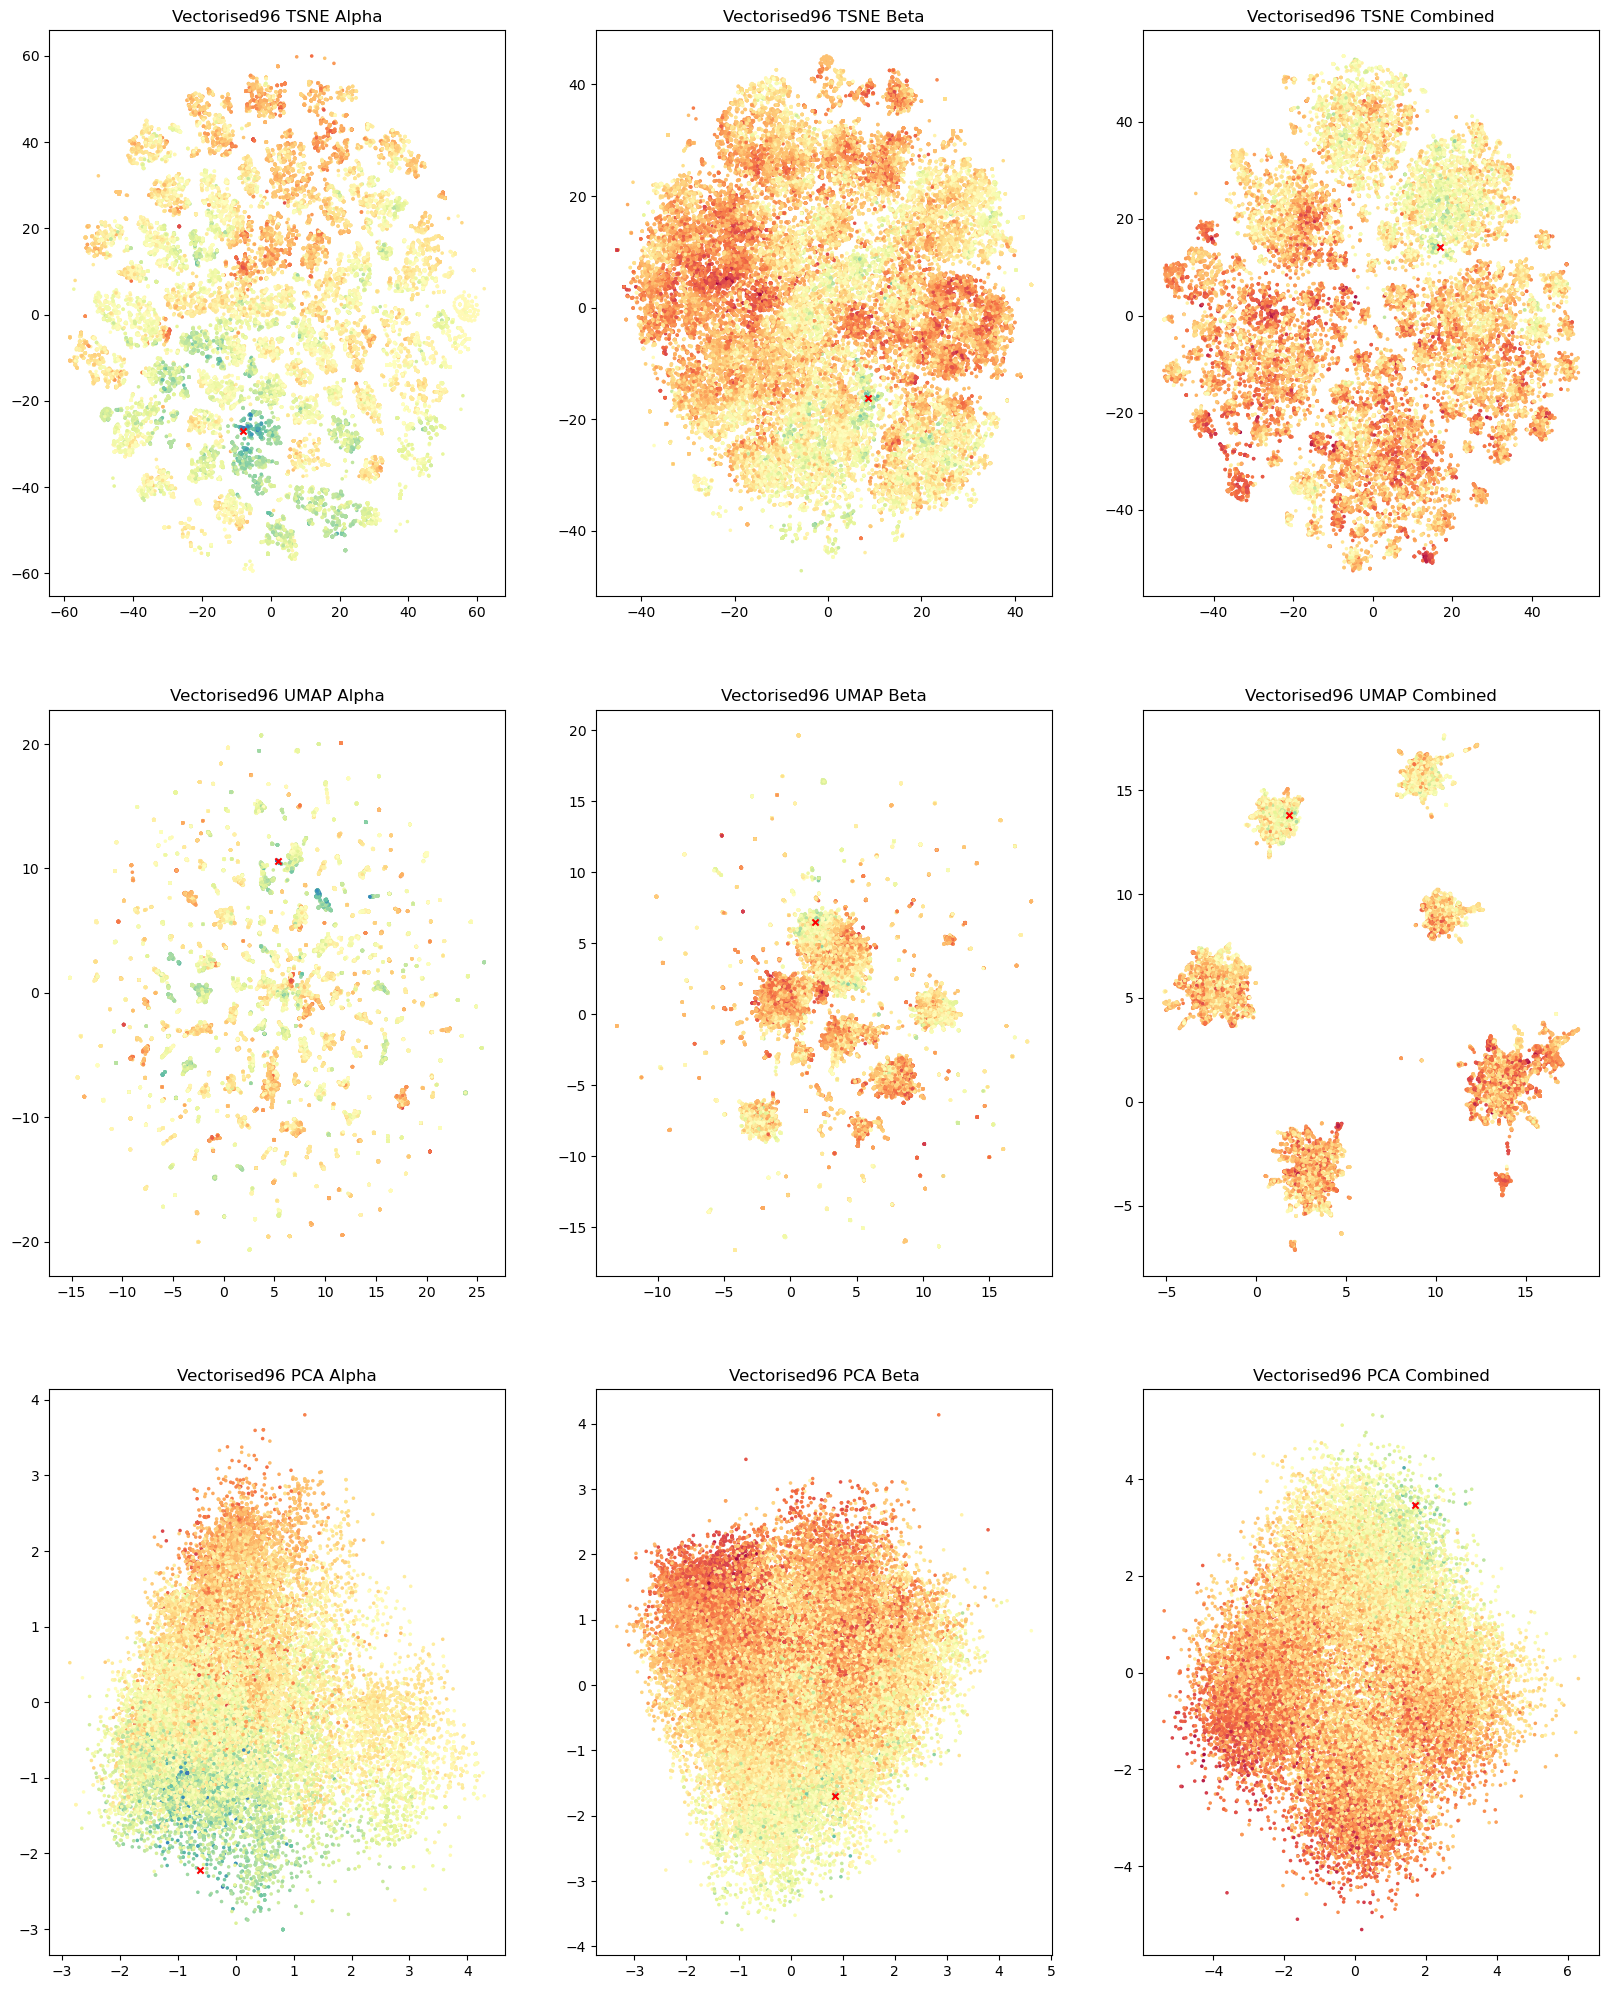

In [52]:
#Run this cell to generate random plots

rand_alpha_chain = np.random.randint(len(vectorised96_cosine_df[0]))
rand_beta_chain = np.random.randint(len(vectorised96_cosine_df[1]))
rand_combined_chain = np.random.randint(len(vectorised96_cosine_df[2]))

plt.figure(figsize=(20 , 25))

plt.subplot(3, 3, 1)
plt.scatter(vectorised96_tsne[0][:, 0], vectorised96_tsne[0][:, 1], c=vectorised96_cosine_df[0][rand_alpha_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_tsne[0][rand_alpha_chain, 0], vectorised96_tsne[0][rand_alpha_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 TSNE Alpha')

plt.subplot(3, 3, 2)
plt.scatter(vectorised96_tsne[1][:, 0], vectorised96_tsne[1][:, 1], c=vectorised96_cosine_df[1][rand_beta_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_tsne[1][rand_beta_chain, 0], vectorised96_tsne[1][rand_beta_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 TSNE Beta')

plt.subplot(3, 3, 3)
plt.scatter(vectorised96_tsne[2][:, 0], vectorised96_tsne[2][:, 1], c=vectorised96_cosine_df[2][rand_combined_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_tsne[2][rand_combined_chain, 0], vectorised96_tsne[2][rand_combined_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 TSNE Combined')

plt.subplot(3, 3, 4)
plt.scatter(vectorised96_umap[0][:, 0], vectorised96_umap[0][:, 1], c=vectorised96_cosine_df[0][rand_alpha_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_umap[0][rand_alpha_chain, 0], vectorised96_umap[0][rand_alpha_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 UMAP Alpha')

plt.subplot(3, 3, 5)
plt.scatter(vectorised96_umap[1][:, 0], vectorised96_umap[1][:, 1], c=vectorised96_cosine_df[1][rand_beta_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_umap[1][rand_beta_chain, 0], vectorised96_umap[1][rand_beta_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 UMAP Beta')

plt.subplot(3, 3, 6)
plt.scatter(vectorised96_umap[2][:, 0], vectorised96_umap[2][:, 1], c=vectorised96_cosine_df[2][rand_combined_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_umap[2][rand_combined_chain, 0], vectorised96_umap[2][rand_combined_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 UMAP Combined')

plt.subplot(3, 3, 7)
plt.scatter(vectorised96_pca[0][:, 0], vectorised96_pca[0][:, 1], c=vectorised96_cosine_df[0][rand_alpha_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_pca[0][rand_alpha_chain, 0], vectorised96_pca[0][rand_alpha_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 PCA Alpha')

plt.subplot(3, 3, 8)
plt.scatter(vectorised96_pca[1][:, 0], vectorised96_pca[1][:, 1], c=vectorised96_cosine_df[1][rand_beta_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_pca[1][rand_beta_chain, 0], vectorised96_pca[1][rand_beta_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 PCA Beta')

plt.subplot(3, 3, 9)
plt.scatter(vectorised96_pca[2][:, 0], vectorised96_pca[2][:, 1], c=vectorised96_cosine_df[2][rand_combined_chain], cmap='Spectral', marker='.', s=10)
plt.scatter(vectorised96_pca[2][rand_combined_chain, 0], vectorised96_pca[2][rand_combined_chain, 1], c='red', marker='x', s=20)
plt.title('Vectorised96 PCA Combined')

In [45]:
rand_alpha_chain = np.random.randint(len(vectorised96_cosine_df[0]))
rand_beta_chain = np.random.randint(len(vectorised96_cosine_df[1]))
rand_combined_chain = np.random.randint(len(vectorised96_cosine_df[2]))

plt.figure(figsize=(20, 8))



<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [46]:
rand_alpha_chain = np.random.randint(len(vectorised96_cosine_df[0]))
rand_beta_chain = np.random.randint(len(vectorised96_cosine_df[1]))
rand_combined_chain = np.random.randint(len(vectorised96_cosine_df[2]))

plt.figure(figsize=(20, 8))



<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>